Pymaceuticals Analysis
--
The Pymaceuticals Study follows 249 mice that have tumor(s) receiving one of 10 types of treatment regimens over a maximum of 45 days.  
The study data set includes:
Mouse Meta Data indicating the Mouse ID, Drug Regimen, Sex, Age (months), and Weight (g)
Study Results with the Mouse ID, Timepoints of measurement collected, Tumor Volume (mm3) and Metastatic Sites

Analysis:
--
At Timepoint 0 all mice start with a Tumor Vol of 45 mm3.  When comparing Tumor Volume and Treatment Regimen at the last timepoint measured for each mouse, it seems that the Treatment Regimens for Capomulin and Ramicane were effective in reducing Tumor Volume because both the upper and lower quartile range of tumor size at the last timepoint for mice were below the 45 cubic millimeter starting point unlike with other treatment regimens where tumors increased in size.    

For Capomulin: Lower Quartile (Q1): 32.37735684: This means that 25% of the tumor volume data for mice treated with this regimen were below 32.38 cubic millimeters at their last time point. Upper Quartile (Q3): 40.1592203: This means that 75% of the tumor volume data for mice treated with this regimen were below 40.16 cubic millimeters at their last time point.
    
For Ramicane: Lower Quartile (Q1): 31. 56046955: This means that 25% of the tumor volume data for mice treated with this regimen were below 31.56 cubic millimeters at their last time point. Upper Quartile (Q3): 40.65900627 This means that 75% of the tumor volume data for mice treated with this regimen were below 40.66 cubic millimeters at their last time point.
    
For Infubinol: Lower Quartile (Q1): 54. 04860769: This means that 25% of the tumor volume data for mice treated with this regimen were below 54.05 cubic millimeters at their last time point. Upper Quartile (Q3): 65.5257485 This means that 75% of the tumor volume data for mice treated with this regimen were below 65.53 cubic millimeters at their last time point.
    
For Ceftamin Lower Quartile (Q1): 48.72207785: This means that 25% of the tumor volume data for mice treated with this regimen were below 31.56 cubic millimeters at their last time point. Upper Quartile (Q3): 64.29983003 This means that 75% of the tumor volume data for mice treated with this regimen were below 64.30 cubic millimeters at their last time point.

When looking at one specific mouse receiving Capomulin Treatment, the tumor volume increased from the 0 Timepoint size of 45 cubic millimeters until 20 days into the study, then the tumor volume started to decrease until day 35 and then increased again slightly.  It seems that it took time for the treatment to become effective but that after 35 days the treatment might have become less effective.

Mouse Weight and Average Tumor Volume has a positive correlation of 0.8493.  As tumor volume was increasing, mouse weight was also increases.  It could be possible to determine the approximate increase in tumor size of a mouse with a tumor by weighing the mouse and using linear regression plotting.    

In [9]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import random
from scipy.stats import linregress, pearsonr


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_df=pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"]) 

study_df_arranged=study_df.loc[:,["Mouse ID", "Timepoint","Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]

# Display the data table for preview
study_df_arranged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice.
number_mice=study_df["Mouse ID"].nunique()
number_mice

249

In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint

grouped_df=study_df.groupby(["Mouse ID","Timepoint"])

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Count the occurances of each mouse at each timepoint
mouse_counts=grouped_df.size()

# Find mice that occur more than once at each timepoint
duplicate_mice_timepoint=mouse_counts[mouse_counts>1]

# Get duplicate mice as an array
duplicate_mice_timepoint_array=duplicate_mice_timepoint.index.values

duplicate_mice_timepoint_array

array([('g989', 0), ('g989', 5), ('g989', 10), ('g989', 15), ('g989', 20)],
      dtype=object)

In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989_data=study_df_arranged.loc[study_df_arranged["Mouse ID"]=="g989"]
mouse_g989_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=study_df_arranged.loc[study_df_arranged["Mouse ID"]!="g989"]
clean_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean=clean_df["Mouse ID"].nunique()
number_mice_clean

248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_vol=clean_df["Tumor Volume (mm3)"]

by_regimen_mean=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

by_regimen_median=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

by_regimen_variance=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

by_regimen_std=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# Calculate SEM using scipy's sem function
by_regimen_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(sem)

# Assemble the resulting series into a single summary DataFrame.

regimen_summary=pd.DataFrame({"Mean Tumor Volume": by_regimen_mean,
    "Median Tumor Volume": by_regimen_median,
    "Tumor Volume Variance": by_regimen_variance,
    "Tumor Volume Standard Deviation": by_regimen_std,
    "Tumor Volume Standard Error": by_regimen_sem})

regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
import warnings
import pandas as pd

# To ignore all warnings
warnings.filterwarnings('ignore')

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean=np.mean,
    Median=np.median,
    Variance=np.var,
    Std_Dev=np.std,
    SEM=sem
)

drug_regimen_summary=pd.DataFrame(summary_stats)

drug_regimen_summary

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

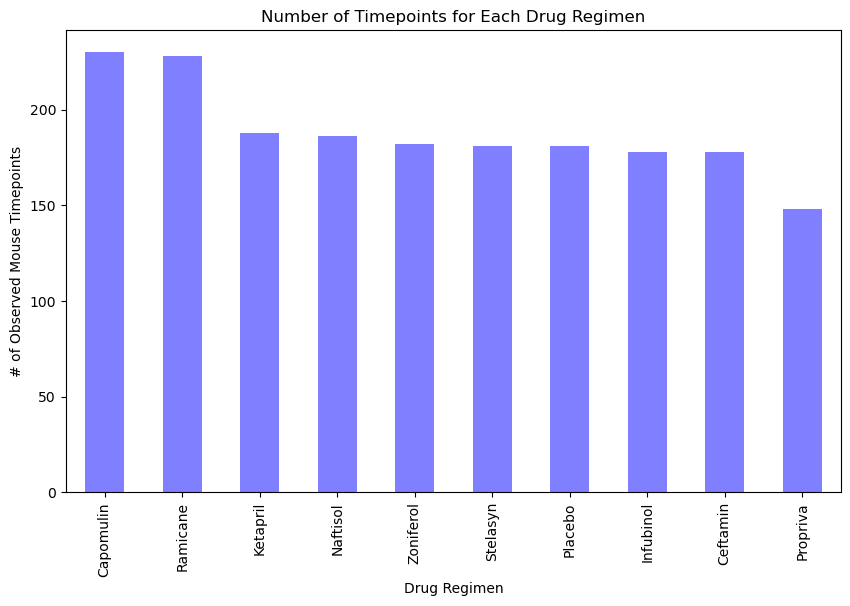

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_counts=clean_df["Drug Regimen"].value_counts()

drug_regimen_counts.plot(kind="bar", figsize=(10,6), color="b", alpha=0.5)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Timepoints for Each Drug Regimen")
plt.xticks(rotation="vertical")


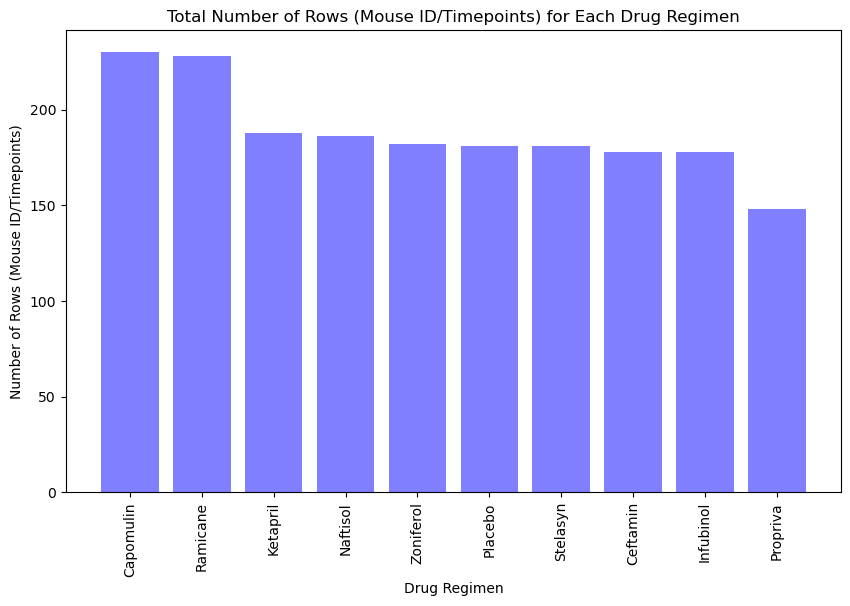

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group by 'Drug Regimen' and count the number of timepoints
row_counts = clean_df.groupby('Drug Regimen').size()

row_counts_sorted= row_counts.sort_values(ascending=False)

# Create x-axis values
x_labels = row_counts_sorted.index
x_values = np.arange(len(x_labels))

# Plot the bar chart
plt.figure(figsize=(10,6))
plt.bar(x_values, row_counts_sorted, color='b', alpha=0.5, align="center")
plt.xticks(x_values, x_labels, rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.show()


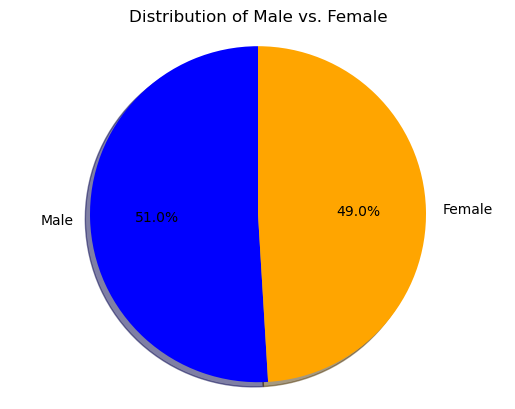

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_male_distribution=clean_df["Sex"].value_counts()
female_male_distribution.plot(kind="pie", colors=["blue", "orange"], autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("Distribution of Male vs. Female")
plt.axis("equal")
plt.ylabel('')
plt.show()


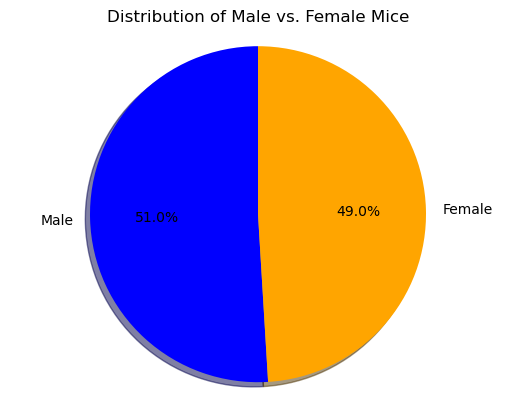

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_male = clean_df["Sex"].value_counts()
mouse_id = clean_df["Mouse ID"].value_counts()
colors = ["blue","orange"]

# Plot using pyplot
plt.pie(female_male, labels=female_male.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Distribution of Male vs. Female Mice")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = clean_df.groupby("Mouse ID")["Timepoint"].max()

max_timepoint_df= max_timepoint_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_merge = max_timepoint_df.merge(clean_df, how="left", on=["Mouse ID","Timepoint"])

print(max_timepoint_df.columns)

# Display the final tumor volume of each mouse across the specified treatment regimens
max_timepoint_merge


Index(['Mouse ID', 'Timepoint'], dtype='object')


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [22]:
# Put treatments into a list for for loop (and later for plot labels)

treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data=[]

#Loop through each treatment regimen
for treatment in treatments:
    
    #Locate the rows which contact mice on each drug and get tumor volumes
    treatment_data=max_timepoint_merge.loc[max_timepoint_merge["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    
    #Add subset
    tumor_vol_data.append(treatment_data)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    print(f"Results for {treatment}:")
    print(f"  Lower Quartile (Q1): {Q1}")
    print(f"  Upper Quartile (Q3): {Q3}")
    print(f"  Interquartile Range (IQR): {IQR}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Potential Outliers: {outliers}")
    print()


Results for Capomulin:
  Lower Quartile (Q1): 32.37735684
  Upper Quartile (Q3): 40.1592203
  Interquartile Range (IQR): 7.781863460000004
  Lower Bound: 20.70456164999999
  Upper Bound: 51.83201549
  Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Results for Ramicane:
  Lower Quartile (Q1): 31.56046955
  Upper Quartile (Q3): 40.65900627
  Interquartile Range (IQR): 9.098536719999998
  Lower Bound: 17.912664470000003
  Upper Bound: 54.30681135
  Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Results for Infubinol:
  Lower Quartile (Q1): 54.04860769
  Upper Quartile (Q3): 65.52574285
  Interquartile Range (IQR): 11.477135160000003
  Lower Bound: 36.83290494999999
  Upper Bound: 82.74144559000001
  Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Results for Ceftamin:
  Lower Quartile (Q1): 48.72207785
  Upper Quartile (Q3): 64.29983003
  Interquartile Range (IQR): 15.577752179999997
  Lower Bound: 25.3554

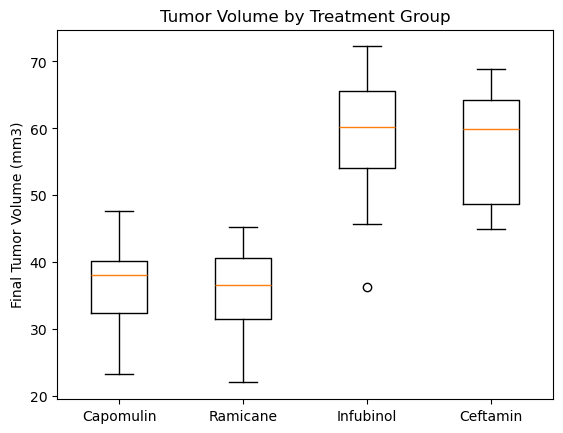

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data)
ax1.set_xticklabels(treatments)

plt.show()

## Line and Scatter Plots

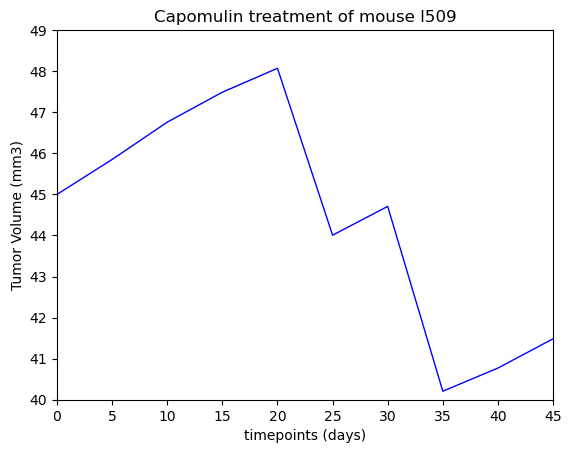

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data=clean_df[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == "l509")]

x_axis=mouse_data["Timepoint"]
vol=mouse_data["Tumor Volume (mm3)"]

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("timepoints (days)")
plt.ylabel("Tumor Volume (mm3)")

# Set the x-axis limits to include the entire range of timepoints
plt.xlim(0, 45)
plt.ylim(40, 49)

plt.plot(x_axis, vol, color="blue", linewidth=1)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

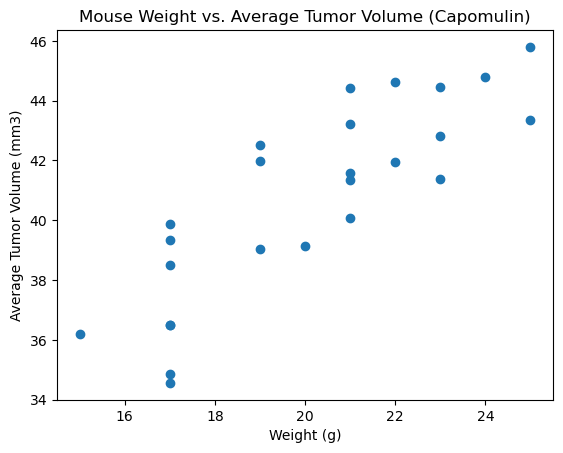

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

weight_avg_tumor_vol=clean_df[clean_df["Drug Regimen"] == "Capomulin"].groupby('Mouse ID')["Tumor Volume (mm3)"].mean()

capomulin_data=pd.merge(weight_avg_tumor_vol, mouse_metadata, on="Mouse ID")

plt.scatter(capomulin_data["Weight (g)"], capomulin_data ["Tumor Volume (mm3)"])

plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

## Correlation and Regression

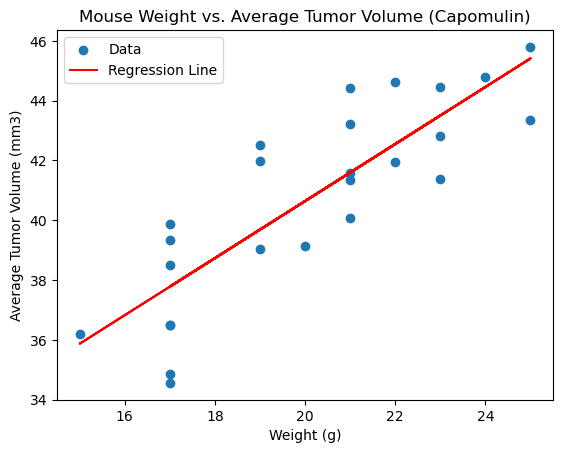

The correlation between mouse weight and the average tumor volume is: 0.8419363424694721


In [26]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])

# Calculate the correlation coefficient
correlation_coefficient = rvalue

# Plot the scatter plot
plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"], label="Data")

# Plot the regression line
regression_line = slope * capomulin_data["Weight (g)"] + intercept
plt.plot(capomulin_data["Weight (g)"], regression_line, color='red', label="Regression Line")

plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

plt.show()

print("The correlation between mouse weight and the average tumor volume is:", correlation_coefficient)